<a href="https://colab.research.google.com/github/baoanth/ThongKe-PhanTichDulieu/blob/main/DA_Week4_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install myst_nb

#1. Binominal Distribution

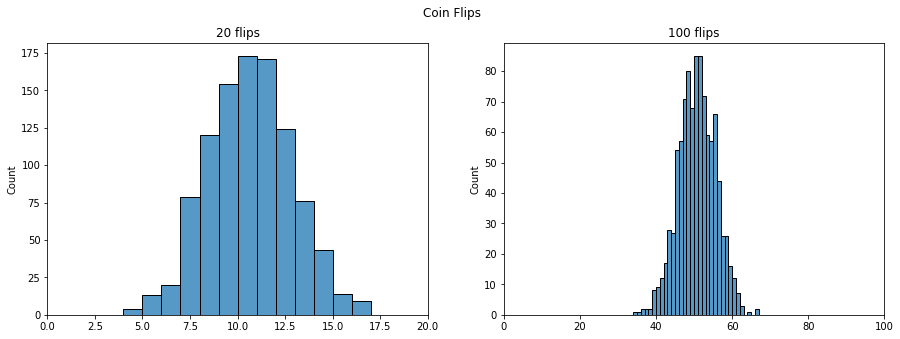

In [ ]:
from myst_nb import glue
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns


x_20 = random.binomial(n=20, p=1/2, size=1000)
x_100 = random.binomial(n=100, p=1/2, size=1000)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Coin Flips')

# 20 flips
sns.histplot(x_20, bins=20,binwidth=1,ax=axes[0])
axes[0].set_title('20 flips')
axes[0].set(xlim=(0,20))

# 100 flips
sns.histplot(x_100, bins=100,binwidth=1, ax=axes[1])
axes[1].set_title('100 flips')
axes[1].set(xlim=(0,100))


glue("fig-binomial", fig, display=False)




In [ ]:
import collections
elements_count = collections.Counter(x_20)
elements_count 
for (k,v) in sorted(elements_count.items(), key=lambda item: item[0]) :
  print(k,v)

4 4
5 13
6 20
7 79
8 120
9 154
10 173
11 171
12 124
13 76
14 43
15 14
16 8
17 1


##Ví dụ 1:
Biết tỉ lệ suy dinh dưỡng ở trẻ em dưới 5 tuổi là 20%. Nếu chúng ta khám 10 trẻ dưới 5 tuổi. Tính xác suất để có 2 em bị suy dinh dưỡng. Như vậy k=2, n=10 và p=0.2.
### a. Xác suất 2 trẻ suy dinh dưỡng?
Chính là giá trị của hàm xác suất nhị phân (binomial probability function): $$P(k=2|n=10, p=0.2)$$
### b. Xác suất ít hơn 2 trẻ suy dinh dưỡng?
#### Cách 1: 
Có thể tính bằng $$P(k<2|n=10, p=0.2) = P(k=1|n=10, p=0.2)+P(k=0|n=10, p=0.2)$$
#### Cách 2: 
Chính là hàm tích lũy xác suất (CDF) tại 2, $$F(2)$$.


In [ ]:
from scipy.stats import binom

#calculate binomial probability
res_pmf = binom.pmf(k=2, n=10, p=0.2)
res_cdf = binom.cdf(k=2, n=10, p=0.2)

#Print the result
print("Xác suất gặp 2 trẻ cùng suy dinh dưỡng: ",res_pmf)
print("Xác suất ít hơn 2 trẻ suy dinh dưỡng: ",res_cdf)



Xác suất gặp 2 trẻ cùng suy dinh dưỡng:  0.30198988800000004
Xác suất ít hơn 2 trẻ suy dinh dưỡng:  0.6777995263999999


### Ví dụ 1b
Biết rằng trong một quần thể dân số có khoảng 50% người mắc bệnh cao huyết áp; nếu chúng ta tiến hành chọn số mẫu 1000 lần, mỗi lần chọn 20 người trong quần thể một cách ngẫu nhiên. Sự phân bố của bệnh nhân cao huyết áp sẽ như thế nào?


Xac suat gap 2 benh nhan cao huyet ap trong 20 benh nhan la: 0.13690942867206338
Xac suat gap it hon 2 benh nhan cao huyet ap trong 20 benh nhan la: 0.20608471894847413


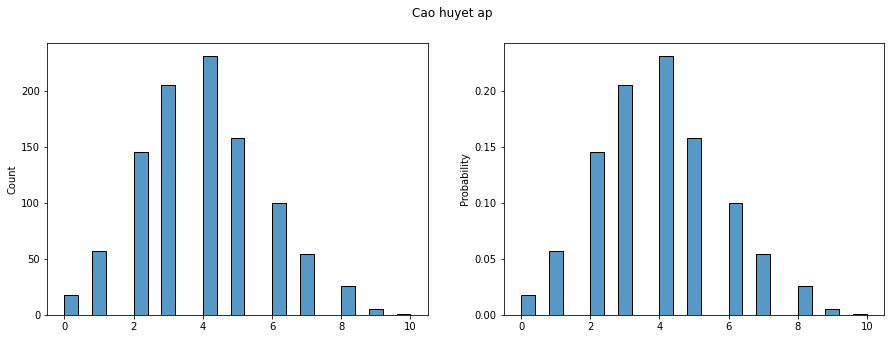

In [ ]:
from numpy import random
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Cao huyet ap')

x_1000 = random.binomial(n=20,p=0.2,size=1000)
sns.histplot(x_1000,ax=axes[0] )
sns.histplot(x_1000, stat = 'probability',ax=axes[1] )
k=2
n =20
p=0.2 # Ty le benh nhan cao huyet ap
#Gia su chon moi lan 20 benh nhan
#Xac suat gap 2 benh nhan cao huyet ap
res_2 = binom.pmf(k=k, n=n, p=p)
res_less_4 = binom.cdf(k=2,n=n,p=p)
print("Xac suat gap {0} benh nhan cao huyet ap trong {1} benh nhan la: {2}".format(k,n,res_2))
print("Xac suat gap it hon 2 benh nhan cao huyet ap trong {1} benh nhan la: {2}".format(k,n,res_less_4))
glue("fig-binomial", fig, display=False)

# 2. Poission Distribution

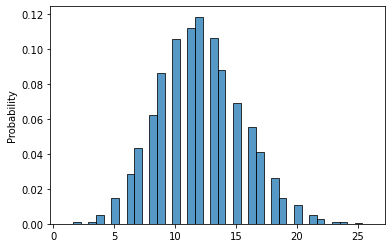

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
s = np.random.poisson(12, 10000)
sns.histplot(s, bins=40, stat="probability")
plt.show()

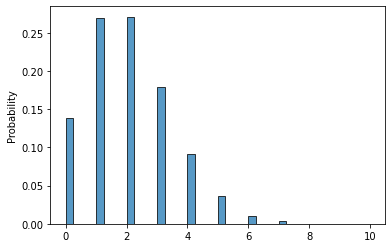

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
s = np.random.poisson(2, 10000)
sns.histplot(s, bins=40, stat="probability")
plt.show()

##Ví dụ 2: 
Tại một cửa hàng tạp hóa, một ngày 8 tiếng làm việc trong giờ hành chính. Nhân viên tại cửa hàng đếm có tổng cộng có 88 khách hàng đến. 
###1.  Hỏi xác xuất một tiếng sau dưới 1 khách hàng đến là bao nhiêu? 
$$P(X≤1)=P(X=0)+P(X=1)=0.0000167+0.0001874=0.0002004
$$
*Nhận xét: Có thể dùng hàm CDF để tính F(1)*
###2. Hỏi xác suất có 15 khách hàng đến trong một tiếng là bao nhiêu?
$$P(X=15) $$
*Nhận xét: Có thể xác định bằng hàm PMF để tính P(15)*


In [ ]:
from scipy.stats import poisson
lambda_val = 88/8
prob_less_1 = poisson.cdf(1, mu=lambda_val)
prob_15 = poisson.pmf(15, mu=lambda_val)
print('Kỳ vọng: lambda = {}'.format(lambda_val))
print('Xác suất dưới 1 khách hàng đến trong 1 tiếng: {}'.format(prob_less_1) )
print('Xác suất có 15 khách hàng đến trong 1 tiếng: {}'.format(prob_15) )


Kỳ vọng: lambda = 11.0
Xác suất dưới 1 khách hàng đến trong 1 tiếng: 0.000200420409482948
Xác suất có 15 khách hàng đến trong 1 tiếng: 0.05335208119043093


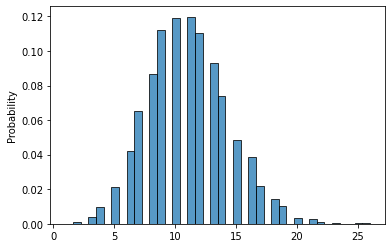

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
s = np.random.poisson(11, 10000)
sns.histplot(s, bins=40, stat="probability")
plt.show()

##Ví dụ 3: Tính xác suất thời gian đợi 
$$P(T \leq t) =1-e^{-λt} $$
Tại một cửa hàng tạp hóa, một ngày 8 tiếng làm việc trong giờ hành chính. Nhân viên tại cửa hàng đếm có tổng cộng có 88 khách hàng đến. 

**Hỏi:** tại thời gian bất kì (trừ cuối giờ hành chính), dưới 15 phút sau xác xuất một khách hàng đến là bao nhiêu?



In [ ]:
import math
def calc_wait_time_prob(lambda_val, time, is_larger=False):    
    base_calc = math.exp(-lambda_val * time)
    if is_larger:
        return base_calc
    else:
        return 1 - base_calc

lambda_value = 88/6
# Chuyển giá trị về 1 tiếng
time = 15/60
calc_wait_time_prob(lambda_value, time, is_larger=False) 
# 0.9744, hoặc 97.4%

0.9744384667934926

#3. Normal Distribution
$$f(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^  { – \frac{{{{(x – \mu )}^2}}}{{2{\sigma ^2}}}} $$

##Hình dạng hàm phân phối xác suất chuẩn

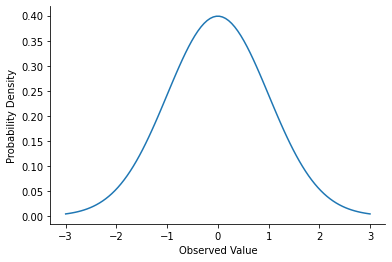

In [ ]:
import matplotlib.pyplot as plt
from myst_nb import glue
import numpy as np
import scipy.stats as stats
import seaborn as sns


mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
fig = sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma))
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')

sns.despine()

glue("normal_fig", fig, display=False)

## Giá trị dưới đường cong (CDF - Hàm tích lũy xác suất)

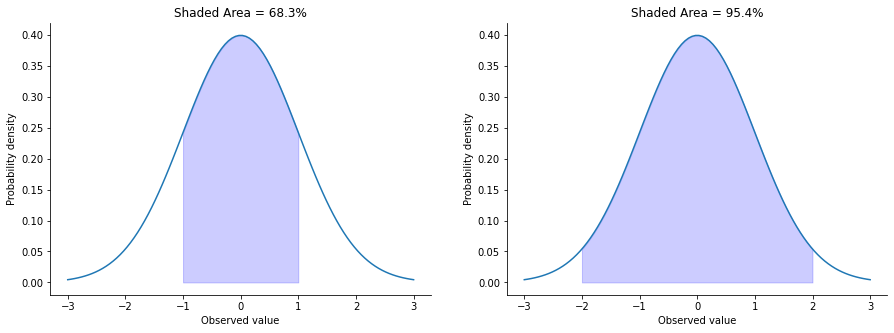

In [ ]:
from myst_nb import glue
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])

x_fill1 = np.arange(-1, 1, 0.001)
x_fill2 = np.arange(-2, 2, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 68.3%")
axes[1].set_title("Shaded Area = 95.4%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()

glue("sdnorm_fig", fig, display=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Probability Density')

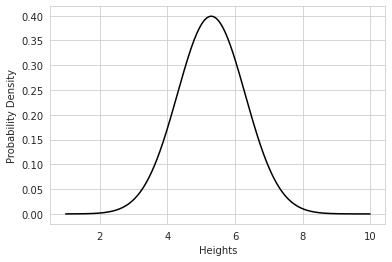

In [ ]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
 
#Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

###Ví dụ 3: 
Giả sử chỉ số IQ của con người tuân theo phân phối chuẩn với trung bình là 100 và độ lệch chuẩn là 15.
###1. Xác suất bắt gặp một người có IQ 120 là bao nhiêu? 
*Sử dụng hàm mật độ xác suất PDF*
###2. Xác suất bắt gặp một người có IQ dưới 90 là bao nhiêu?
*Sử dụng hàm tích lũy xác suất CDF*
###3. Xác suất bắt gặp một người có IQ trong khoản 130 đến 140 là bao nhiêu?
*Sử dụng hàm tích lũy xác suất CDF*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


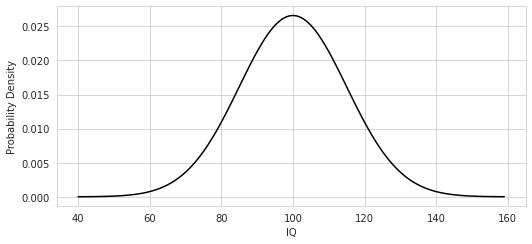

1. Xac suat gap mot nguoi co chi so IQ 120:  0.010934004978399577
2. Xac suat gap mot nguoi co chi so IQ duoi 90:  0.2524925375469229
3. Xac suat gap mot nguoi co 130< IQ <150   0.022321071614982424


In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

data = np.arange(40,160,1)
pdf = norm.pdf(data , loc = 100 , scale = 15 )

sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')

plt.xlabel('IQ')
plt.ylabel('Probability Density')
plt.show()

iq_120 = norm( loc = 100 , scale = 15 ).pdf(120)
iq_less_90 = norm( loc = 100 , scale = 15 ).cdf(90)
iq_less_130 = norm( loc = 100 , scale = 15 ).cdf(130)
iq_less_150 = norm( loc = 100 , scale = 15 ).cdf(150)

print("1. Xac suat gap mot nguoi co chi so IQ 120: ", iq_120)
print("2. Xac suat gap mot nguoi co chi so IQ duoi 90: ", iq_less_90)
print("3. Xac suat gap mot nguoi co 130< IQ <150  ", iq_less_150-iq_less_130)


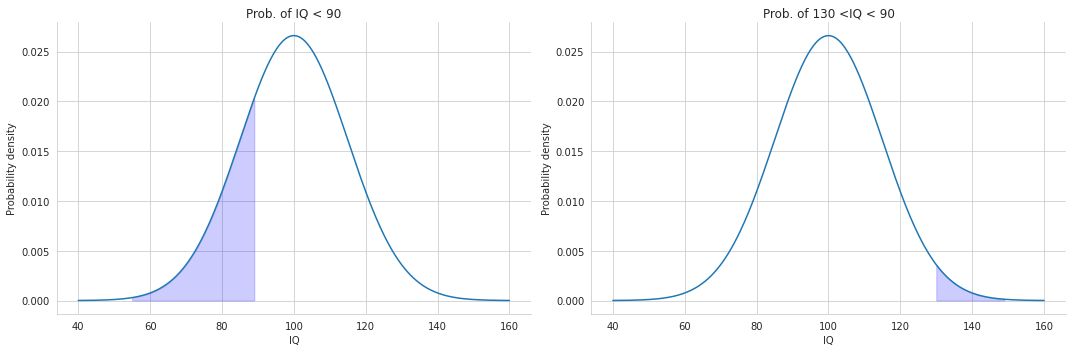

In [ ]:
from myst_nb import glue
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 100
#variance = 15^2
sigma = 15
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)

sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])

x_fill1 = np.arange(mu-3*sigma, 90, 1)
x_fill2 = np.arange(130, 150, 1)

y_fill1 = stats.norm.pdf(x_fill1,100,15)
y_fill2 = stats.norm.pdf(x_fill2,100,15)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Prob. of IQ < 90")
axes[1].set_title("Prob. of 130 <IQ < 90")

axes[0].set(xlabel='IQ', ylabel='Probability density')
axes[1].set(xlabel='IQ', ylabel='Probability density')

sns.despine()

glue("sdnorm_fig", fig, display=False)